In [ ]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/content/gdrive/My Drive/cm146/pset2/regression_train.csv'
test_path = '/content/gdrive/My Drive/cm146/pset2/regression_test.csv'
### ========== TODO : END ========== ###

In [ ]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [ ]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [ ]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        Phi = np.ones((n, self.m_ + 1))  # Create a matrix with ones in the first column
        for i in range(1, self.m_ + 1):
            Phi[:, i] = X[:, 0] ** i

        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None:
                eta = 1 / (1 + t)  # Decreasing learning rate per iteration
            else:
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = X @ self.coef_  # Matrix multiplication for predictions
            gradient = (-2 / n) * (X.T @ (y - y_pred))  # Vectorized gradient computation
            self.coef_ += eta * gradient  # Apply update
            # Track error
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            # Debugging print to track cost reduction
            if t % 100 == 0:  # Print every 100 iterations
                print(f"Iteration {t}, Cost: {err_list[t][0]:.4f}, Learning Rate: {eta:.6f}")

            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d' % (t+1))

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = np.linalg.pinv(X.T @ X) @ (X.T @ y)

        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        X = self.generate_polynomial_features(X)
        y_pred = X @ self.coef_
        cost = np.mean((y - y_pred) ** 2)  # MSE formulation
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y))
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...


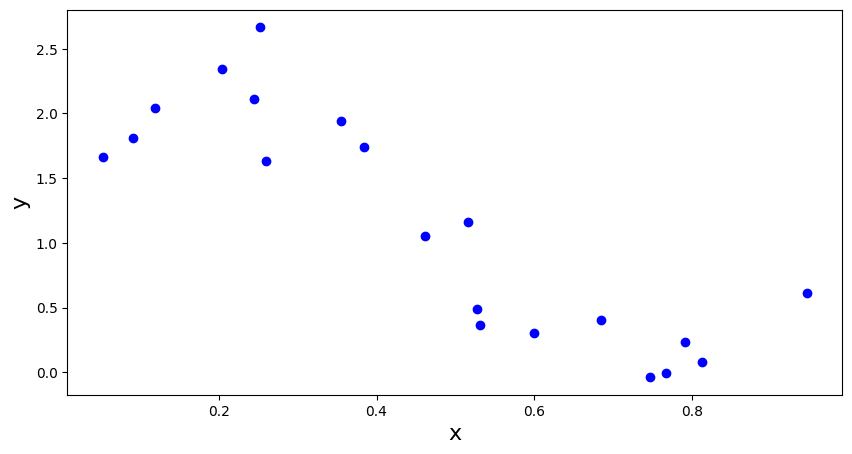

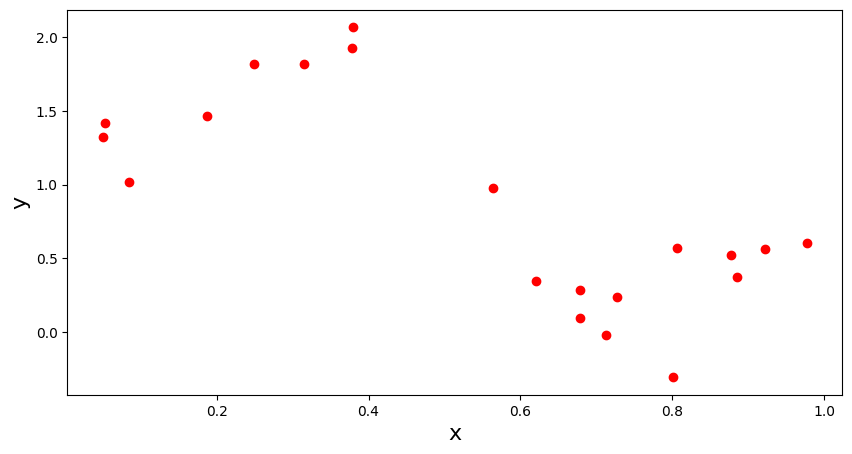

Investigating linear regression...
Closed-form solution coefficients: [ 2.44640709 -2.81635359]

Gradient Descent with learning rate η = 1e-06
Iteration 0, Cost: 2.0117, Learning Rate: 0.000001
Iteration 100, Cost: 2.0122, Learning Rate: 0.000001
Iteration 200, Cost: 2.0128, Learning Rate: 0.000001
Iteration 300, Cost: 2.0134, Learning Rate: 0.000001
Iteration 400, Cost: 2.0139, Learning Rate: 0.000001
Iteration 500, Cost: 2.0145, Learning Rate: 0.000001
Iteration 600, Cost: 2.0150, Learning Rate: 0.000001
Iteration 700, Cost: 2.0156, Learning Rate: 0.000001
Iteration 800, Cost: 2.0162, Learning Rate: 0.000001
Iteration 900, Cost: 2.0167, Learning Rate: 0.000001
Iteration 1000, Cost: 2.0173, Learning Rate: 0.000001
Iteration 1100, Cost: 2.0178, Learning Rate: 0.000001
Iteration 1200, Cost: 2.0184, Learning Rate: 0.000001
Iteration 1300, Cost: 2.0189, Learning Rate: 0.000001
Iteration 1400, Cost: 2.0195, Learning Rate: 0.000001
Iteration 1500, Cost: 2.0201, Learning Rate: 0.000001
Itera

<Figure size 640x480 with 0 Axes>

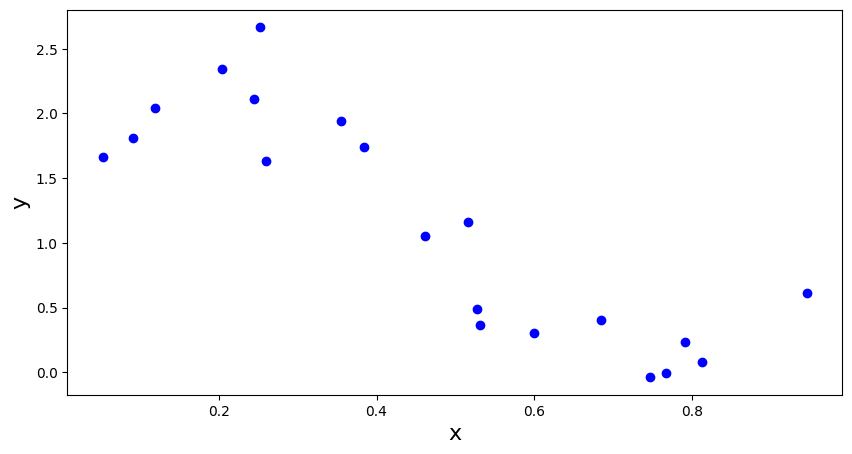

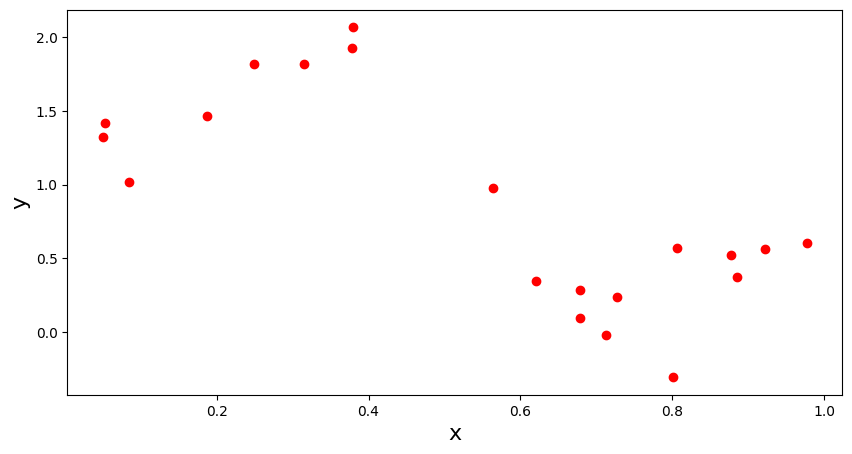

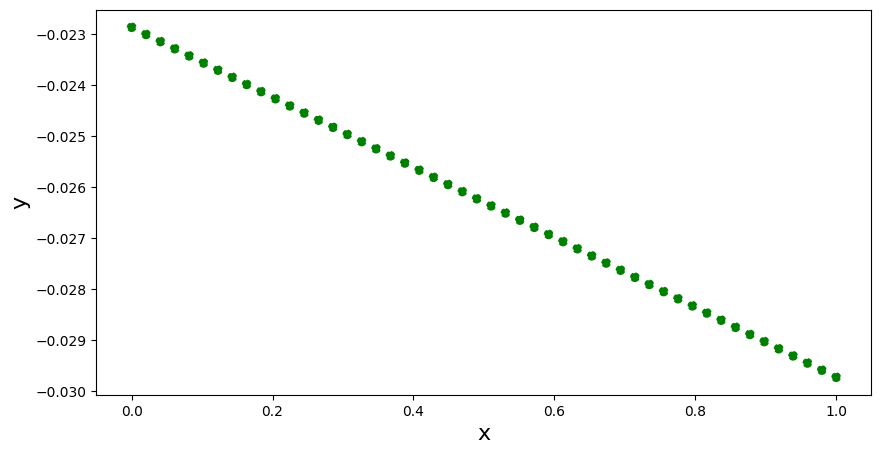

<ipython-input-37-7551b37f5a37>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


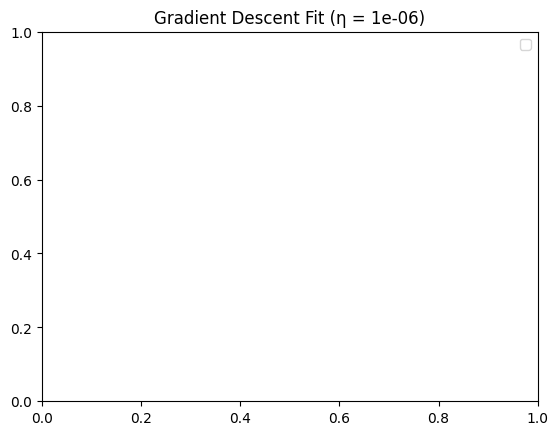


Gradient Descent with learning rate η = 1e-05
Iteration 0, Cost: 2.0117, Learning Rate: 0.000010
Iteration 100, Cost: 2.0173, Learning Rate: 0.000010
Iteration 200, Cost: 2.0229, Learning Rate: 0.000010
Iteration 300, Cost: 2.0285, Learning Rate: 0.000010
Iteration 400, Cost: 2.0342, Learning Rate: 0.000010
Iteration 500, Cost: 2.0398, Learning Rate: 0.000010
Iteration 600, Cost: 2.0456, Learning Rate: 0.000010
Iteration 700, Cost: 2.0513, Learning Rate: 0.000010
Iteration 800, Cost: 2.0571, Learning Rate: 0.000010
Iteration 900, Cost: 2.0628, Learning Rate: 0.000010
Iteration 1000, Cost: 2.0687, Learning Rate: 0.000010
Iteration 1100, Cost: 2.0745, Learning Rate: 0.000010
Iteration 1200, Cost: 2.0804, Learning Rate: 0.000010
Iteration 1300, Cost: 2.0863, Learning Rate: 0.000010
Iteration 1400, Cost: 2.0922, Learning Rate: 0.000010
Iteration 1500, Cost: 2.0982, Learning Rate: 0.000010
Iteration 1600, Cost: 2.1042, Learning Rate: 0.000010
Iteration 1700, Cost: 2.1102, Learning Rate: 0.

<Figure size 640x480 with 0 Axes>

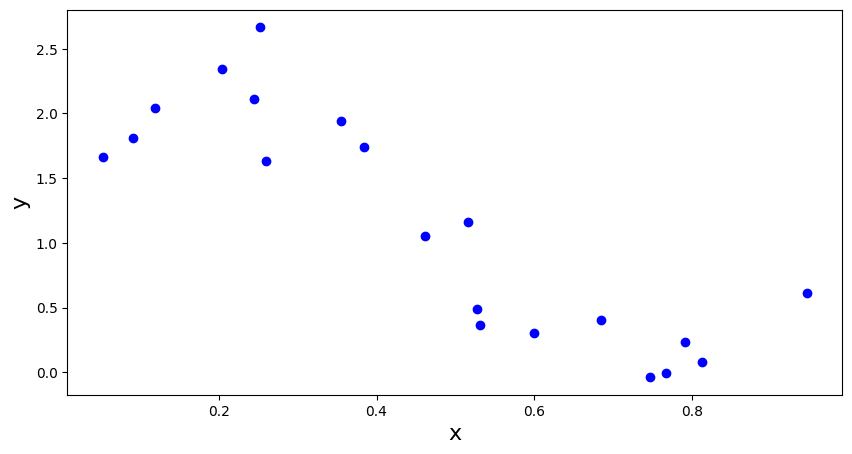

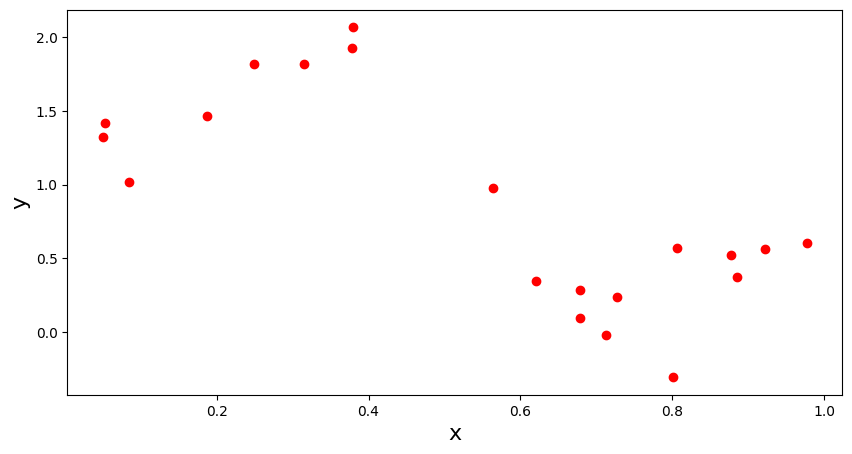

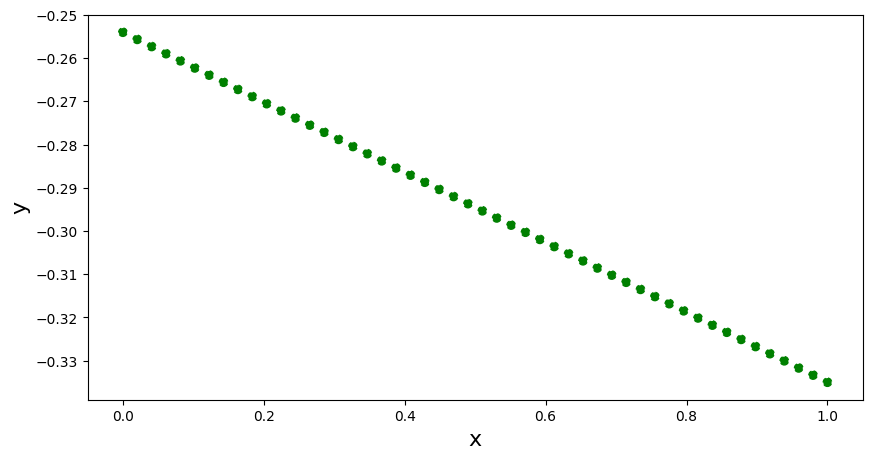

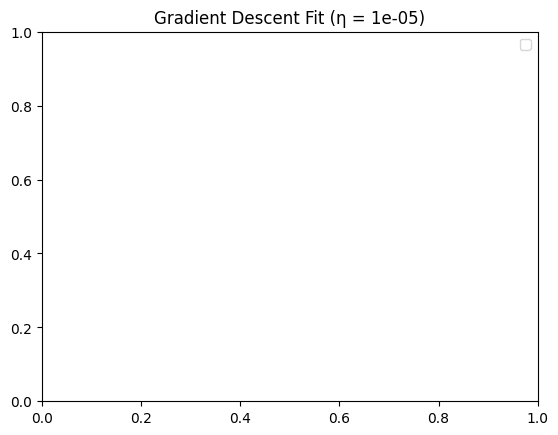


Gradient Descent with learning rate η = 0.001
Iteration 0, Cost: 2.0117, Learning Rate: 0.001000
Iteration 100, Cost: 2.7249, Learning Rate: 0.001000
Iteration 200, Cost: 3.8814, Learning Rate: 0.001000
Iteration 300, Cost: 5.7627, Learning Rate: 0.001000
Iteration 400, Cost: 8.8291, Learning Rate: 0.001000
Iteration 500, Cost: 13.8333, Learning Rate: 0.001000
Iteration 600, Cost: 22.0063, Learning Rate: 0.001000
Iteration 700, Cost: 35.3613, Learning Rate: 0.001000
Iteration 800, Cost: 57.1906, Learning Rate: 0.001000
Iteration 900, Cost: 92.8782, Learning Rate: 0.001000
Iteration 1000, Cost: 151.2294, Learning Rate: 0.001000
Iteration 1100, Cost: 246.6436, Learning Rate: 0.001000
Iteration 1200, Cost: 402.6698, Learning Rate: 0.001000
Iteration 1300, Cost: 657.8195, Learning Rate: 0.001000
Iteration 1400, Cost: 1075.0732, Learning Rate: 0.001000
Iteration 1500, Cost: 1757.4284, Learning Rate: 0.001000
Iteration 1600, Cost: 2873.3247, Learning Rate: 0.001000
Iteration 1700, Cost: 469

<Figure size 640x480 with 0 Axes>

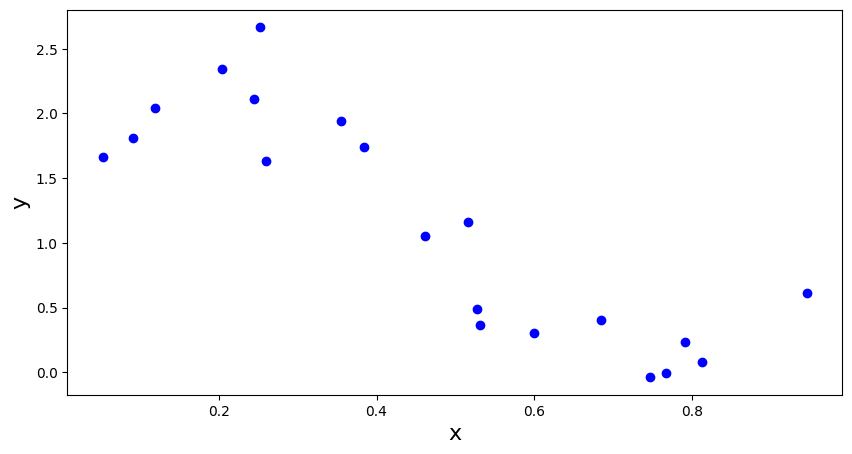

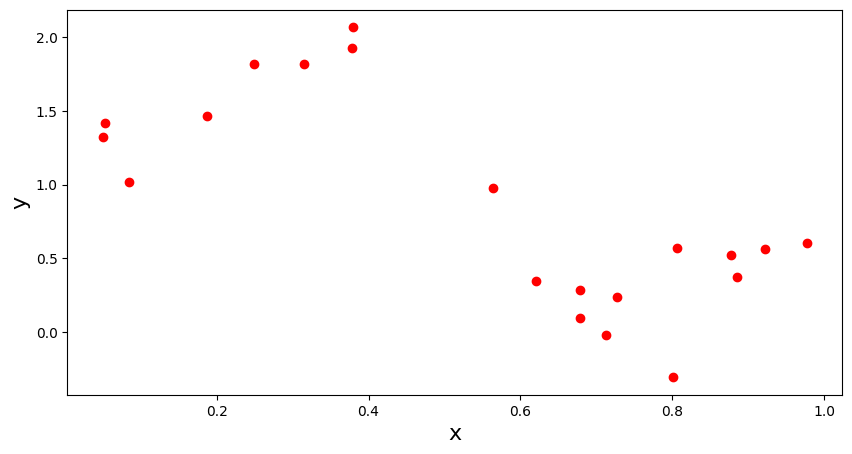

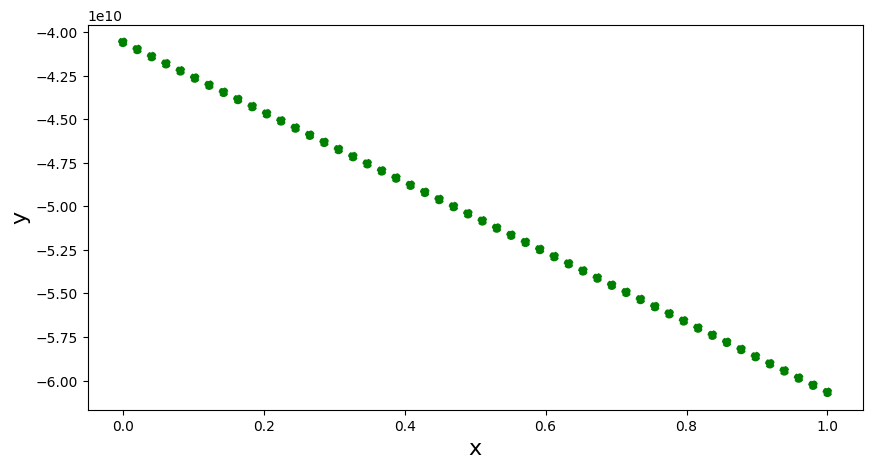

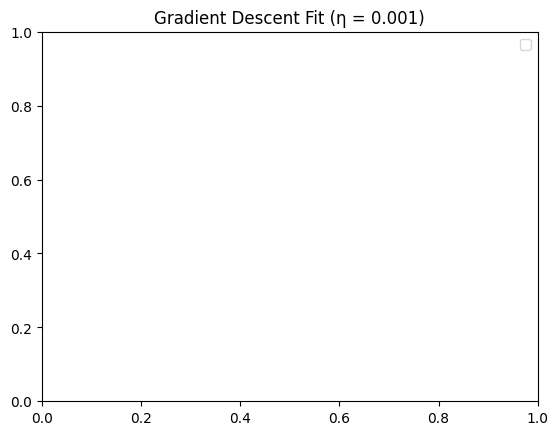


Gradient Descent with learning rate η = 0.1
Iteration 0, Cost: 2.0117, Learning Rate: 0.100000
Iteration 100, Cost: 14476145230092900352.0000, Learning Rate: 0.100000
Iteration 200, Cost: 190986711239305045089705261725583933440.0000, Learning Rate: 0.100000
Iteration 300, Cost: 2519726300768227711667019853231093622957525314659342614528.0000, Learning Rate: 0.100000
Iteration 400, Cost: 33243258599431390008887819251880736906022718566768538637335351418326490284032.0000, Learning Rate: 0.100000
Iteration 500, Cost: 438585032815563197501264297084290168806139597635143284167949910474005671922010390081675722752000.0000, Learning Rate: 0.100000
Iteration 600, Cost: 5786341024135297692289022005888251908446935004969871200828721573857515912929586887336531928046773275117612127223808.0000, Learning Rate: 0.100000
Iteration 700, Cost: 76340367186381162758366615232757338259916071721998766677711403168874630290050971171370907919529065033987848031752020823642181312970752.0000, Learning Rate: 0.100000
I

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-36-c28e75f0e0bd>:108: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
<ipython-input-36-c28e75f0e0bd>:100: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
<ipython-input-36-c28e75f0e0bd>:97: RuntimeWarning: overflow encountered in matmul
  gradient = (-2 / n) * (X.T @ (y - y_pred))  # Vectorized gradient computation


 [-inf -inf]


<Figure size 640x480 with 0 Axes>

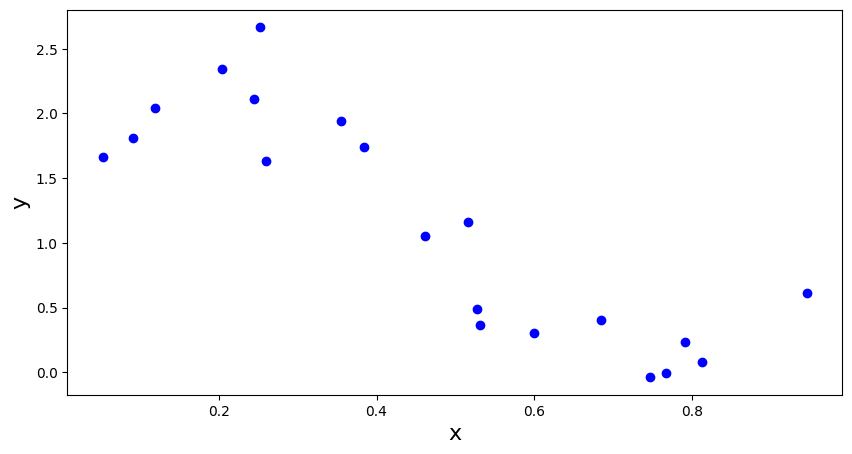

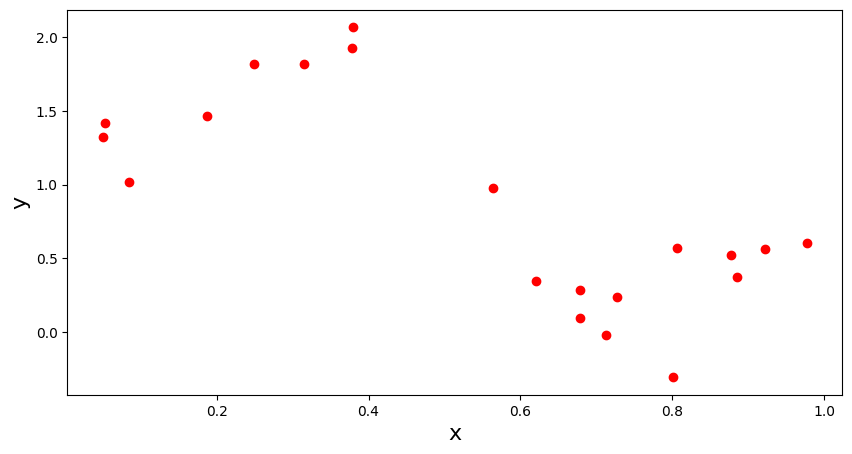

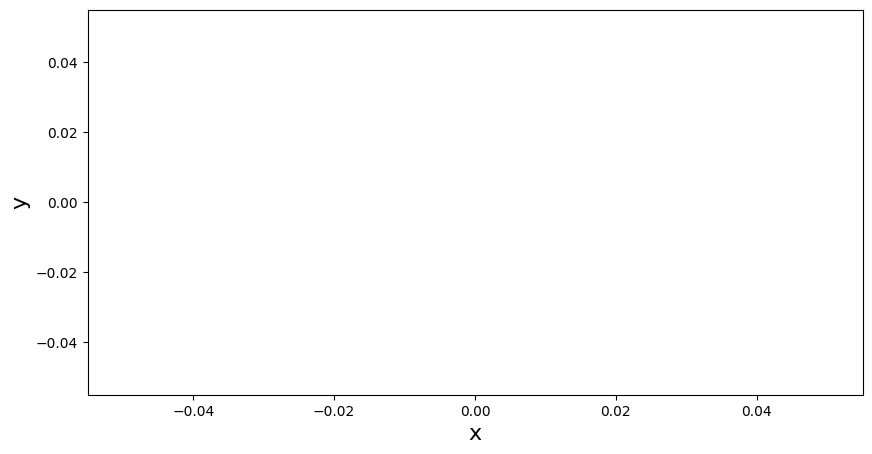

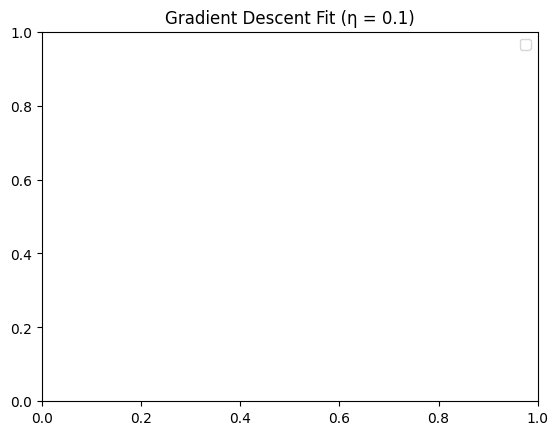

Linear Regression RMSE - Train: 0.4423, Test: 0.5936
Investigating polynomial regression...
Degree 0: Train RMSE = 0.8571, Test RMSE = 0.7473
Degree 1: Train RMSE = 0.4423, Test RMSE = 0.5936
Degree 2: Train RMSE = 0.4413, Test RMSE = 0.5957
Degree 3: Train RMSE = 0.2443, Test RMSE = 0.3719
Degree 4: Train RMSE = 0.2297, Test RMSE = 0.3639
Degree 5: Train RMSE = 0.2268, Test RMSE = 0.3551
Degree 6: Train RMSE = 0.2245, Test RMSE = 0.3675
Degree 7: Train RMSE = 0.2223, Test RMSE = 0.4250
Degree 8: Train RMSE = 0.2223, Test RMSE = 0.4057
Degree 9: Train RMSE = 0.2118, Test RMSE = 1.4825
Degree 10: Train RMSE = 0.2117, Test RMSE = 2.0078


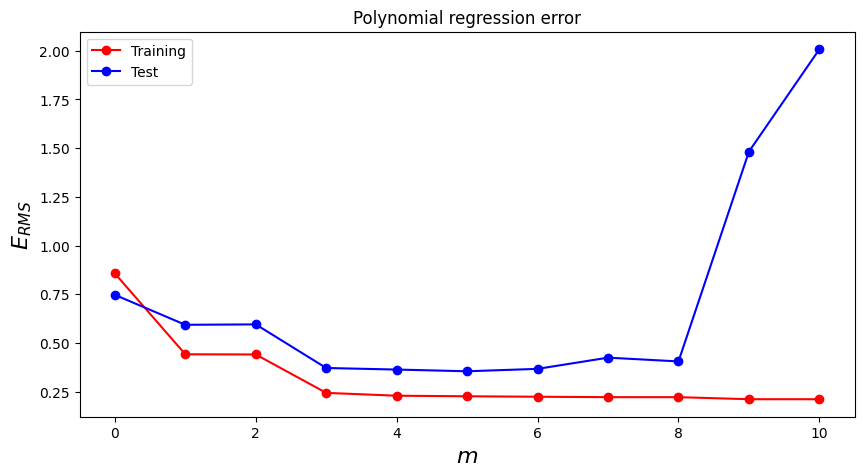

Done!


In [ ]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')

    # Plot training data
    plot_data(train_data.X, train_data.y, color='blue', label="Training Data")

    # Plot test data
    plot_data(test_data.X, test_data.y, color='red', label="Test Data")

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')


    # Initialize linear regression model (m=1 for simple linear regression)
    model_lin = PolynomialRegression(m=1)

    # Fit using closed-form solution
    model_lin.fit(train_data.X, train_data.y)
    print("Closed-form solution coefficients:", model_lin.coef_)

    # Fit using gradient descent with different learning rates
    etas = [1e-6, 1e-5, 1e-3, 0.1]
    for eta in etas:
        print(f"\nGradient Descent with learning rate η = {eta}")

        model_gd = PolynomialRegression(m=1)
        model_gd.fit_GD(train_data.X, train_data.y, eta=eta)

        print("GD Coefficients:", model_gd.coef_)

         # Plot GD regression result
        plt.figure()
        plot_data(train_data.X, train_data.y, color='blue', label="Training Data")
        plot_data(test_data.X, test_data.y, color='red', label="Test Data")
        model_gd.plot_regression(color='green', linestyle='dashed', label=f"GD Fit η={eta}")
        plt.legend()
        plt.title(f"Gradient Descent Fit (η = {eta})")
        plt.show()

    # Compare RMSE for training and test data
    train_rmse = model_lin.rms_error(train_data.X, train_data.y)
    test_rmse = model_lin.rms_error(test_data.X, test_data.y)
    print(f"Linear Regression RMSE - Train: {train_rmse:.4f}, Test: {test_rmse:.4f}")

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')

    # Try polynomial degrees from 0 to 10
    m_values = np.arange(11)
    train_errors = []
    test_errors = []

    for m in m_values:
        model_poly = PolynomialRegression(m)
        model_poly.fit(train_data.X, train_data.y)

        # Compute RMSE
        train_rmse = model_poly.rms_error(train_data.X, train_data.y)
        test_rmse = model_poly.rms_error(test_data.X, test_data.y)

        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

        print(f"Degree {m}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")

    # Plot RMSE vs Polynomial Degree to analyze overfitting
    plot_erms(m_values, train_errors, test_errors)

    ### ========== TODO : END ========== ###


    print("Done!")

if __name__ == "__main__":
    main()
